<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/6_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue;'>REGRESION LINEAL</h1>

Los modelos de regresión lineal es un buen punto de partida para iniciarse con los modelos o estimadores de aprendizaje supervisado en SKlearn.

La regresión lineal es muy popular porque:
<ul><li>convergen rápido, tiene un coste computacional bajo,</li> 
<li>la interpretación de los resultados es intuitiva </li></ul>

Aunque tiene la desventaja de que solo sirve si hay una dependencia lineal o polinómica en los datos.

Todo el mundo conocemos el ajuste de unos datos a una linea recta, pero vamos a ver que este método es muy potente y puede extenderse para modelar comportamientos más complicados de los datos.

# 0. Cargamos las librerías necesarias

Cargamos todas las librerías de DataScience para ver las versiones que tenemos instaladas en el sistema y configuramos matplot lib para que muestre las imagenes inline, ie. en la misma celda que la genera.

In [39]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))


import seaborn as sns; sns.set()
print("seaborn version: {}".format(sns.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas version: 1.1.5
matplotlib version: 3.2.2
seaborn version: 0.11.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 1.0.1


# 1. Regresion Linear Simple

## 1.1 Generamos los datos

Para generar los datos vamos a crear una funcion que nos devuelve unos arrays con datos de prueba.

En este caso van a ser datos que siguen una tendencia lineal pero añadimos algo de ruido aleatorio que generamos con la función $np.random$. La función debe generar m datos de entrenamiento *x*,*y* en torno a una linea de pendiente *m* y corte *c*:

In [40]:
def make_data(n,m,c,rnd_st=1):
    #Esta funcion devuelve m muestras de datos que tienen una dependencia lineal y = mx+c
    #añadir ruido a los datos (x,y) para que no tengan exactamente una relación lineal
    rng = np.random.RandomState(rnd_st)
    x = 10 * rng.rand(n)
    y = m * x - c + rng.randn(n)
    # generar una matriz x[[]] con el formato que recesita el estimador array([[]])
    return x[:, np.newaxis],y

In [41]:
rng = np.random.RandomState(1)

In [42]:
a,b =make_data(2,20,5,0)
a

array([[5.48813504],
       [7.15189366]])

## 1.2 Generar el modelo

Tomamos un ejemplo simple de unos datos de entrenamiento $X=[x_i]$ e $Y=[y_i]$ que ajustamos a una linea recta. 

El modelo va a aprender la recta $y = ax + b$   que mejor ajusta a estos datos. La recta que obtendremos viene descrita por los parámetros del modelo, que son  $a$ la *pendiente*, y  $b$  el *corte* con el eje $x$ ó *intercept*.


Tomamos unos 50 datos de entrenamiento. Van a estar en torno a una linea de pendiente 2 y corte -5:

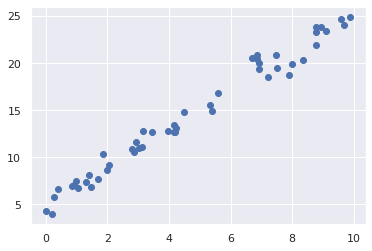

In [43]:
x,y= make_data(50,2,-5)
plt.scatter(x, y);

En SKLearn exite un estimador de regresion lineal que aplica el método de ajuste por minimos cuadrados. Se llama <a href='http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares'>``LinearRegression``</a>.

Tomaremos este modelo y lo ajustamos a los datos de entrenamiento utilizando el metodo $.fit$. <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression'><br>Ver parametros que puede admitir este modelo</a>

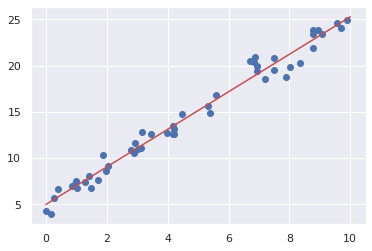

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c='r');

Veamos los atributos del modelo generado.

En SKLearn son propiedades del estimador y sus nombres terminan normalmente en barra baja.
En este caso los parámetros son ``coef_`` e ``intercept_``:

In [45]:
print("Pendiente del modelo:    ", model.coef_[0])
print("Corte con el eje de las abcisas:", model.intercept_)
model.get_params(deep=True)

Pendiente del modelo:     2.0272088103606953
Corte con el eje de las abcisas: 5.001422914446794


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## 1.2 Evaluación del modelo

Para medir la calidad del modelo de regresión lineal, Scikit-Learn tiene una serie de métricas que podemos aplicar<a href='http://scikit-learn.org/stable/modules/model_evaluation.html'><br>Ver mas info sobre la evaluacion de los modelos</a>

<div class="alert alert-block alert-info">El método de medida de calidad por defecto para la regresión lineal es el *coeficiente de determinación*, denominado $R^2$ y pronunciado $R$ cuadrado. Este coeficiente estima la cantidad de muestras futuras que el modelo probablemente predecirá de forma correcta. También significa la proporción de varianza de la variable $y$ que el modelo puede predecir a partir de las variables de entrada $x_i$.

$R^2$ se define como:
$$
R^2= 1 - [((y_{true} - y_{pred})^2).sum()/ ((y_{true} - y_{true}.mean())^2).sum()]
$$

El mejor valor es 1.0 y un valor de 0.0 significa que el modelo es tan bueno como uno que predice un valor constante independientemente de las variables de entrada. El coeficiente puede tomar también valores negativos porque el modelo puede ser arbitrariamente malo.
</div>
Podemos medir el *coeficiente de determinación* para nuestro modelo con el método ```.score```, puesto que es el método de scoring por defecto:

In [46]:
from sklearn.metrics import r2_score
print("El coef R^2 es:", model.score(x, y))
print("El coef R^2 es:", r2_score(y, model.predict(x)))

El coef R^2 es: 0.9790800609430612
El coef R^2 es: 0.9790800609430612


<div class="alert alert-block alert-warning">

Obtenemos que el modelo probablemente predecirá de forma correcta al 97,9% para futuras muestras.

Esto puede parecer muy bueno, pero como probablemente ya habréis pensado que hemos evaluado el modelo sobre los mismos datos que hemos utilizado para entrenar el modelo. Los resultados son lógicamente muy buenos, otra cosa sería sí realmente dispusiesemos de más muestras que nos permitiesen verificar esta capacidad de prediccion.
</div>

Esto puede hacerse de manera automatica con las librerías de SKLearn, reservando algunas de las muestras para la fase de test.

Los datos iniciales, los partimos en datos de entrenamiento y datos de test con la función __train_test_split__:

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>Ver detalle de esta función</a>

In [47]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
x1, x2, y1, y2 = train_test_split(x, y, random_state=0, train_size=0.5)

# fit the model on one set of data
model.fit(x1, y1)

# evaluate the model on the second set of data
from sklearn.metrics import r2_score
y2_model = model.predict(x2)
r2_score(y2, y2_model)

0.9734612809005607

Solo tenemos 50 muestras pero ya se ve que el score baja.

### 1.2.1 Cross Validation

Scikit-Learn nos permite ajustar el modelo utilizando como entrenamiento o test diferentes partes del dataset. Es como hacer la medida anterior pero varias veces, con varios experimentos y esto nos daría diferentes medidas de calidad en cada uno. Al final podemos pensar que la calidad del modelo sería la media de la calidad de los experimentos que hemos hecho.

Este procedimiento de validación se denomina ``Cross Validation`` y puede calcularse automáticamente en Scikit-Learn con *cross_val_score*.

Por ejemplo, hacemos una validacion con 5 experimentos y vemos que el scoring baja un poco más:

In [48]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, x, y, cv=5)
print('scores -> ', scores)
print('media de la calidad del modelo ->', scores.mean())

scores ->  [0.94862285 0.97341761 0.98887571 0.96664272 0.98217243]
media de la calidad del modelo -> 0.9719462615694526


Existen diferentes métodos de medir la precision del modelo.
<a href='http://scikit-learn.org/stable/modules/model_evaluation.html'><br>Ver diferentes métricas disponibles para evaluar la precisión de un modelo</a>


In [49]:
scores= cross_val_score(model, x, y,  cv=5) #scoring='r2', is default
scores

array([0.94862285, 0.97341761, 0.98887571, 0.96664272, 0.98217243])

In [50]:
scores= cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv=5)
scores

array([-0.78335622, -0.66269289, -0.69516749, -0.95168029, -0.56590105])


# 2. Regresion Linear Multivariable 

El modelo de ``LinearRegression`` puede servir para ajustar modelos multidimensionales:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde tenemos multiples variables $x$.
Geometricamente esto significa que el modelo encuentra el hyperplano que mejor explica la variable $y$ a partir de las variables $x$ multidimensional.

El hecho de ser multidimensional hace que el modelo sea más dificil de visualizar, pero nos indica la importancia de las diferentes dimensiones para explicar la variable $x$. En este caso las variables con coeficientes mayores son las que tienen más peso como variables explicativas de $y$.

# Ejemplo: predecicción de precios

## 2.1 Datos 

Utilizaremos un conjunto de datos de prueba de las librerías SKLearn para ilustrar una regresión multivariable. SKLearn tiene una serie de herramientas para hacer pruebas, como generadores de datos, conjuntos de datos de prueba, etc..

<a href='http://scikit-learn.org/stable/datasets/index.html'>La lista de utilidades de datos de SKLearn</a>

Vamos a utilizar el modelo de regresión para predecir el precio de casas en función de una serie de características de la misma y la zona donde está situada. 

Utilizamos el set de datos llamado boston, que recoge una muestra de precios de casas en los suburbios de Boston en 1978 y contiene 506 muestras con 14 variables, una de ellas, el precio.

<a href='http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-datasetl'>Detalle del conjunto de datos de precios de las casas</a>


In [51]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Veamos los datos que contiene el dataset:

In [52]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [53]:
print('Variables: ', boston.feature_names)

print('Dimension de x los datos de las casas: ', boston.data.shape)
print('Dimensión de y los precios: ', boston.target.shape)
max_precio = np.max(boston.target)
min_precio = np.min(boston.target)
medio_precio = np.mean(boston.target)
print('Valoresde los precios:  max %.1f  - medio %.1f - min %.1f' %(max_precio, medio_precio, min_precio))
print('Primera muestra de datos:\n ', boston.data[0])

Variables:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dimension de x los datos de las casas:  (506, 13)
Dimensión de y los precios:  (506,)
Valoresde los precios:  max 50.0  - medio 22.5 - min 5.0
Primera muestra de datos:
  [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


Construimos el modelo de regression multivariable:

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=33) 

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train,y_train)

model.predict(X_test)

from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, X_test, y_test, cv=5)
print('scores -> ', scores)
print('media de la calidad del modelo ->', scores.mean())

print('COEFICIENTES-------------------------------------')
contador=0
for e in boston.feature_names:
    print(e+': %.2f' % model.coef_[contador])
    contador+=1


scores ->  [0.58598907 0.69876884 0.14183798 0.72136156 0.51118911]
media de la calidad del modelo -> 0.5318293137410708
COEFICIENTES-------------------------------------
CRIM: -0.13
ZN: 0.05
INDUS: 0.02
CHAS: 3.16
NOX: -14.77
RM: 4.19
AGE: -0.01
DIS: -1.51
RAD: 0.30
TAX: -0.01
PTRATIO: -0.87
B: 0.01
LSTAT: -0.54


En el ejemplo anterior los datos $y$ se construyen a partir de 13 variables $x$ y el modelo descubre unos coeficientes de ajuste. Siendo el más importante __NOX *(nitric oxides concentration)*__ que influye negativamente, de ahí el trabajo ‘Hedonic prices and the demand for clean air’ que inspiró este dataset.

Ahora representamos en una gráfica los datos originales y las predicciones, para evaluar gráficamente el ajuste del modelo:

Text(0, 0.5, 'y_predict')

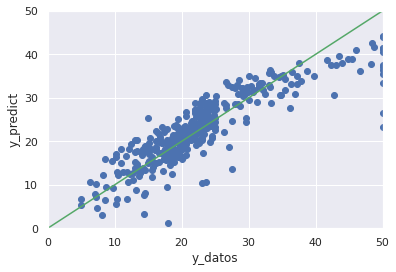

In [55]:
y_pred = model.predict(X_train)
plt.scatter(y_train, y_pred)
plt.plot([0,max_precio],[0,max_precio],'g-')
plt.xlim((0,max_precio))
plt.ylim((0,max_precio))
plt.xlabel("y_datos")
plt.ylabel("y_predict")

Así que el modelo de ``LinearRegression`` ajusta lineas e hyperplanos a nuestros datos.

Y puede parecer que este modelo se limita a describir relaciones estrictamente lineales entre las variables, pero veamos que esto puede relajarse también y podemos describir relaciones no lineales con las variables.


# 3. Regresion con funciones básicas

Un truco para adaptar la regresión lineal para describir relaciones no lineales puede ser utilizar más variables de entrada, creadas como *funciones básicas* de las variables que tenemos. 

Por ejemplo podemos además de las variables qe tenemos, contruir otras que sean variables polinómicas de éstas. Intuitivamente construimos más variables y esto hace que nuestro modelo tenga mayor potencia a la hora de explicar la variable $y$.

La idea es que si tenemos un modelo multidimensional:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
Podemos además añadir otras variables de la forma $x_n = f_n(x_1,x_2,x_3)$, donde $f_n()$ es una funcion que transforma las variables iniciales.

Por ejemplo, si $f_n(x) = x^n$, nuestro modelo se convierte en un modelo de regresión polinómica:
$$
y = a_0 + a_1 x_1 + a_2 x_1^2 + a_3 x_1^3 + a_4 x_1 x_2 + a_5 x_2^2 \cdots
$$

Seguimos teniendo un modelo lineal porque la dependencia con las variables de entrada sigue siendo lineal con un factor multiplicativo $a_i$ para cada variable, pero ahora el modelo puede explicar dependencias polinómicas de $y$ con respecto de las variables iniciales $x$.

## 3.1 Funciones básicas de tipo Polinomial

El hecho de crear nuevas variables polinómicas es muy habitual para mejorar los modelos y en SKLearn hay una función que las calcula automáticamente. Es el transformador ``PolynomialFeatures``:

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html'>Detalle de uso del transformador Polinomial</a>

In [56]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

El transformador ha convertido nuestra variable unidimensional con 3 muestras en una variable trimensional con tres muestras, tomando los valores del cuadrado y el cubo de la variable inicial.

Veamos por ejemplo como podemos ajustar la función seno con un modelo lineal y una variable, construyendo nuevas variables y tomando un polinomio de grado 7. 

NOTA: Puedes probar con diferentes grados del polinomio para ver la calidad del ajuste.

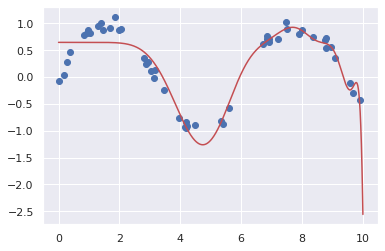

In [57]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly = PolynomialFeatures(20, include_bias=False)
model = LinearRegression(fit_intercept=True)

model.fit(poly.fit_transform(x[:, None]), y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(poly.fit_transform(xfit[:, None]))

plt.scatter(x, y)
plt.plot(xfit, yfit, c='r');

In [58]:
print('La calidad del modelo sobre todo el set de datos: ', model.score(poly.fit_transform(x[:, None]), y))
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,poly.fit_transform(x[:, None]), y,scoring='r2',cv=5)
print('La calidad del modelo con 5 validaciones: ',scores.mean())

La calidad del modelo sobre todo el set de datos:  0.885466045866823
La calidad del modelo con 5 validaciones:  -0.5266603688279486


Nuestro modelo lineal puede usarse con funciones polinómicas de orden 7 y nos permite ajustar modelos no lineales!!

Para crear variables polinomicas o refactorizar las variables de entrada y correr un modelo se utilizan en Scikit-Learn los ```pipelines```. Estos permiten encadenar la construccion de las variables y los modelos en un nuevo estimador o modelo.

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html'>Detalle de uso del pipeline</a>

Veamos como el ejemplo anterior puede hacerse con uno de estos ```pipelines```:

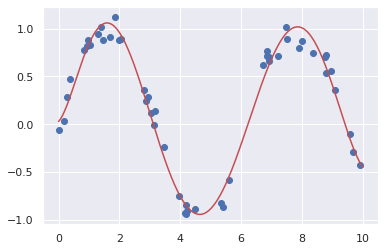

In [59]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

#los valores de x, y xfit son los mismos que en el caso anterior y no los redefinimos
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, c='r');

## 4. DISEÑO DE UN MODELO DE REGRESION LINEAL


Hemos visto que para un problema determinado, tenemos muchas posibilidades de generación de modelos de regresión lineal y podemos calcular su *scoring*, ¿pero como podemos decidir cuál es el mejor modelo en cada caso?

Vamos a ver como diseñar el algoritmo para obtener un resultado optimo.


<div class="alert alert-block alert-info">A la hora de diseñar un modelo de regresión lineal:
<br>
- las variables de entrada $x_i$ serán todas aquellas que estén correlacionadas con la variable que deseamos modelar $y$. 
<br>
- Después hemos visto que podemos construir nuevas variables a partir de funciones básicas de las variables originales y añadirlas para construir modelos más potentes y complejos.
<br><br>
De manera que la cuestión es: __¿qué variables utilizar y cuántas?__.</div>


Vemos que dado un dataset para el entrenamiento podemos aprender curvas de regresión que se ajusten tanto como queramos a nuestro datos. Pero nuestros datos muestran una tendencia y tienen ruido, entonces cuanto debemos ajustarlos?

- Si el modelo no es lo suficientemente complicado, estaremos describiendo una tendencia que no explica toda la variación de los datos, tenemos PROBLEMAS DE SUBAJUSTE (__UNDERFITING__). Cuando tengamos que hacer nuevas previsiones van a parecer generadas como una constante, como si siempre el modelo diera el mismo resultado. El modelo está SESGADO (__BIAS__)


- Si el modelo es demasiado complicado, quizá estamos describiendo el ruido y no la tendencia que buscamos, tenemos PROBLEMAS DE SOBREAJUSTE (__OVERFITTING__). Cuando tengamos que hacer previsiones, con un modelo con tanto ruido, van a parecer que están generadas de manera aleatoria. El modelo tiene demasiada VARIANZA (__VARIANCE__)




Con el siguiente ejemplo podemos ver como con un modelo de regresión lineal y variables polinómicas, podemos representar una tendencia de tipo funcion coseno:

- Si tomamos un modelo lineal sin variables polinómicas, el modelo es una linea y no explica la tendencia cosenoidal real de los datos. El modelo es muy simple y tenemos un ajuste muy pobre.


- Si tomamos un modelo con 4 variables polinómicas, el modelo explica la tendencia con un buen ajuste


- Si tomamos un modelo con 15 variables polinómicas, el modelo es demasiado complicado y tenemos un sobre ajuste de los datos.


Medimos el Error Cuadrático Medio de los residuos del modelo de regresión lineal y vemos que disminuye si el modelo se hace demasiado complejo. Cuanto más complejo se hace el modelo, éste describe cada vez mejor los datos del set de entrenamiento.

Medimos el coeficiente de determinación para el set de entrenamiento y para nuevas muestras en el set de validación o test y observamos que:

- Si el modelo es muy simple, $R^2$ tiene un valor similar en ambos casos. Un modelo pobremente ajustado siempre predice lo mismo, metas los datos que metas.

- Si el modelo es demasiado complicado, $R^2$ será muy bueno con el set de entrenamiento pero muy malo con el set de validación.

Esto nos sirve para buscar y poder diseñar el modelo que mejor generalice la tendencia de los datos.

Text(0, 0.5, 'y')

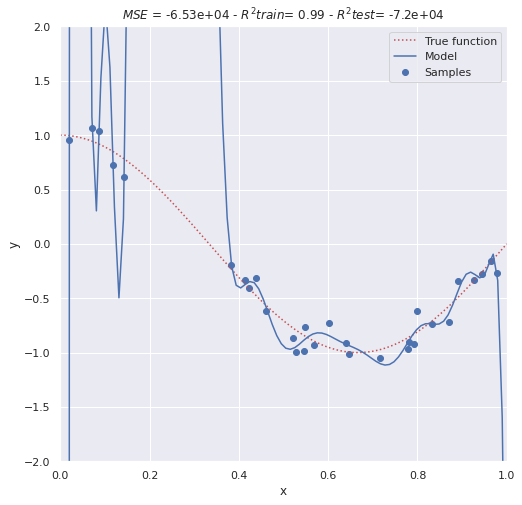

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

def makeCosData(n,rnd_st):
    np.random.seed(rnd_st)
    '''función makeCosData(n,rnd_st) que genera
    un conjunto de datos con dependencia coseno(3PI/2) con o sin ruido'''
    x_data = np.random.rand(n)
    y_cos_conruido = np.cos(1.5 * np.pi * x_data)+ np.random.randn(n) * 0.1
    
    return x_data, y_cos_conruido
    

##DATASETS###############################
n_samples = 30

#training set
x, y_samp = makeCosData(n_samples,0)

#test set
x_test, y_test = makeCosData(n_samples,1)


##THE LINEAL REGRESSION MODEL WITH POLYNOMIAL FEATURES
#Constuir un estimador que encadena PolynomialFeatures y LinearRegression en un pipeline 
polynomial_features = PolynomialFeatures(20,include_bias=False)

linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

#ajusta el modelo NOTA: ponemos en formato matriz x[[]]
pipeline.fit(x[:, np.newaxis], y_samp)


##VALIDATION
# Measure MSE -> evaluate the models using crossvalidation
scores = cross_val_score(pipeline, x[:, np.newaxis], y_samp, scoring="neg_mean_absolute_error", cv=5)

# Measure r2_score
r2_training = r2_score(y_samp,pipeline.predict(x[:, np.newaxis]))
r2_test = r2_score(y_test, pipeline.predict(x_test[:, np.newaxis]))

#the model predictions and theoretical values
xfit = np.linspace(0, 1, 100)
yfit = pipeline.predict(xfit[:, None])
yteor = np.cos(1.5 * np.pi * xfit)


#the plot
plt.figure(figsize=(8, 8))
plt.plot(xfit, yteor , label="True function", c='r', linestyle=':')
plt.scatter(x, y_samp, c='b', label='Samples')
plt.plot(xfit, yfit, label='Model' );
plt.title("$MSE$ = {:.2e} - $R^2 train$= {:.2} - $R^2 test$= {:.2}".format(scores.mean(),r2_training,r2_test))
plt.legend(loc="best")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.xlabel("x")
plt.ylabel("y")

## 4.1 CURVAS DE VALIDACION

En Scikit-Learn tenemos una clase ``validation_curve`` que nos permite calcular automáticamente el scoring de un modelo sobre los datos de training y validación de manera iterativa para diferentes grados de complegidad del modelo.

Al hacer este cálculo, podemos obtener una serie de datos y representarlos en curvas para ver como evolucionan. Estas curvas nos mostrarán el grado de complejidad adecuado para nuestro modelo.

El modelo será optimo cuando el scoring del validación sea lo más alto posible, que es el momento cuando el modelo generaliza bien.

<a url="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html">Ver más información sobre *validation_curve*</a>


Veamos como podemos generar estas curvas de scores de los datos de entrenamiento para diferentes valores del grado de polinomio del modelo:


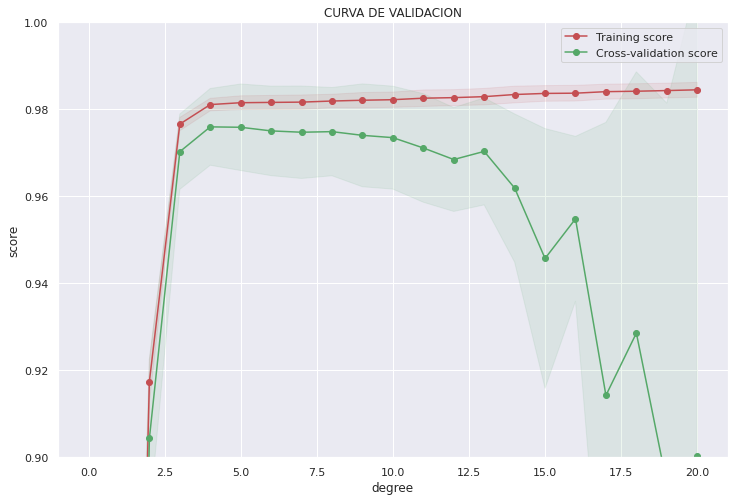

In [61]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

##DATASETS###############################
n_samples = 100

#training set
x, y_samp = makeCosData(n_samples,0)

#test set
x_test, y_test = makeCosData(n_samples,1)


##THE LINEAL REGRESSION MODEL WITH POLYNOMIAL FEATURES
#build the pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

## GENERATE VALIDATION CURVES
degree = np.arange(0, 21)
train_scores, test_scores = validation_curve(PolynomialRegression(), 
                                             x[:, np.newaxis], 
                                             y_samp,
                                             param_name='polynomialfeatures__degree', param_range=degree, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


## REPRESENTACIÓN GRÁFICA
plt.figure(figsize=(12, 8))
plt.title("CURVA DE VALIDACION")

plt.fill_between(degree, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(degree, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(degree, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(degree, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc='best')
plt.ylim(0.9, 1) #zoom entre 0.9 y 1
plt.xlabel('degree')
plt.ylabel('score');

#### Esto demuestra cuantitativamente el nivel de ajute del modelo a medida que vamos subiendo el grado del polinomio de ajuste y lo vamos haciendo más complejo:
- Para el modelo lineal o grados polinomicos bajos el score sobre los datos de entrenamiento y test o validación es similar en ambos casos u bajo.

- Cuando el modelo se hace más complejo y subimos el grado del polinomio, vamos mejorando el score de entrenamiento y de validación, hasta que llega un momento que el modelo queda sobre ajustado y el score de validación empieza a bajar monótonamente.

De este comportamiento, vemos que el ajuste óptimo se da para un __MODELO POLINOMICO DE GRADO 4__ y representamos el modelo con los datos de entrada:

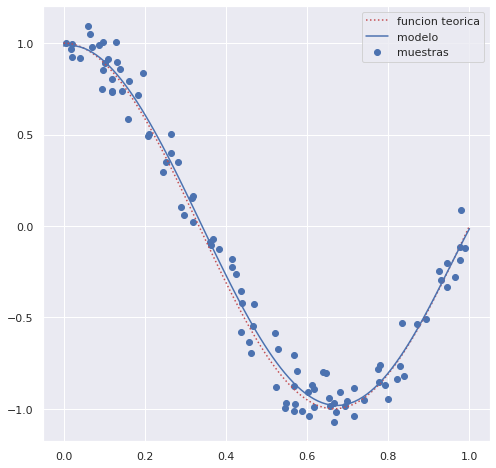

In [62]:
plt.figure(figsize=(8, 8))


#the model predictions and theoretical values
xfit = np.linspace(0, 1, 100)
yfit = PolynomialRegression(5).fit(x[:, np.newaxis], y_samp).predict(xfit[:, np.newaxis])
yteor = np.cos(1.5 * np.pi * xfit)

plt.scatter(x, y_samp, label='muestras')
plt.plot(xfit, yteor, c='r', linestyle=':', label='funcion teorica')
plt.plot(xfit, yfit, label='modelo')
plt.legend(loc="best")
plt.axis();

## 4.2 CURVAS DE APRENDIZAJE

Otra medida necesaria en los modelos de regresión para poder diseñarlos correctamente son las curvas de aprendizaje. Este método nos ayuda también a entender si el numero de muestras de entrenamiento es el correcto y si la complejidad del modelo que hemos seleccionado es la correcta.

Las curvas de aprendizaje representan el scoring del modelo en función del número de datos en el set de entrenamiento y es de esperar que en general:


- si tenemos pocos datos de entrenamiento el score de entrenamiento será muy bueno (cualquier modelo ajusta unos pocos datos muy bein) y el scoring de test será malo.

- cuantos más datos de entrenamiento, el score de entrenamiento ira empeorando un poco hasta que llegue un momento que ya queda estable, porque añadir más datos no varía el error medio del ajuste. Pensemos por ejemplo, que si los datos siguen una tendencia simplemente lineal, el numero de datos que necesitaríamos para entrenar el modelo sería solamente 2 datos, los que describen la lineal. 

- cuantos más datos de entrenamiento, el score de validación irá mejorando hasta quedar estable. Es posible que este scoring converja con el de entrenamiento y ambos sean bajos, entonces tenemos un problema de BIAS (ajuste pobre). En el caso de que el el score de entrenamiento sea mayor podemos tener un problema de (VARIANCE) sobreajuste. En este caso amentar el numero de muestras de entrenamiento puede ayudar o reducir la complejidad del modelo.

En Scikit-Learn tenemos una clase ``learning_curve`` que nos permite calcular automáticamente el scoring de un modelo sobre los datos de training y validación de manera iterativa para diferentes tamaños de muestras para entrenarlo.

Al hacer este cálculo, podemos obtener una serie de datos y representarlos en curvas para ver como evolucionan. Estas curvas nos mostrarán si el numero de muestras de entrenamiento es suficiente y si el grado de complejidad que estamos usando es adecuado para nuestro modelo.

El modelo será optimo cuando el scoring del validación sea lo más alto posible, que es el momento cuando el modelo generaliza bien.

<a url="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html">Ver más información sobre *learning_curve*</a>

Veamos como podemos generar estas curvas de scores de los datos de entrenamiento para diferentes valores del set de datos. Variaremos la complejidad del modelo para observar como afecta esto a las curvas de aprendizaje:


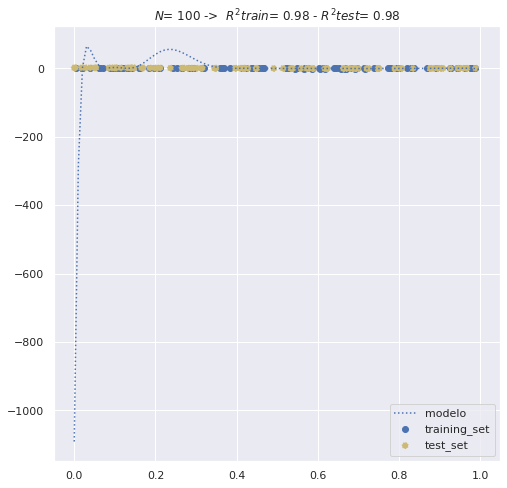

In [63]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#sizes
n_samples_train = 100
n_samples_test = 100

##DATASETS###############################
#training set
x, y_samp = makeCosData(n_samples_train,0)

#test set
x_test, y_test = makeCosData(n_samples_test,1)


##THE LINEAL REGRESSION MODEL WITH POLYNOMIAL FEATURES
#build the pipeline
def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

model= PolynomialRegression(5).fit(x[:, np.newaxis], y_samp)


# Measure r2_score
r2_training = r2_score(y_samp,model.predict(x[:, np.newaxis]))
r2_test = r2_score(y_test, model.predict(x_test[:, np.newaxis]))


#the model predictions and theoretical values
xfit = np.linspace(0, 1, 100)
yfit = pipeline.predict(xfit[:, None])
yteor = np.cos(1.5 * np.pi * xfit)


## GENERATE LEARNING CURVES
plt.figure(figsize=(8, 8))
plt.title("$N$= {} ->  $R^2 train$= {:.2} - $R^2 test$= {:.2}".format(n_samples_train, r2_training,r2_test))
plt.scatter(x, y_samp, label='training_set')

#y_test_predict = model.predict(x_test[:, np.newaxis])
plt.plot(xfit, yfit, c='b', linestyle=':', label='modelo')
plt.scatter(x_test, y_test, c='y', linestyle=':',label='test_set')
plt.legend(loc='best')
plt.axis();

In [64]:
np.linspace(0.1, 1.0, 25)

array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ])

Generamos las curvas de aprendizaje:

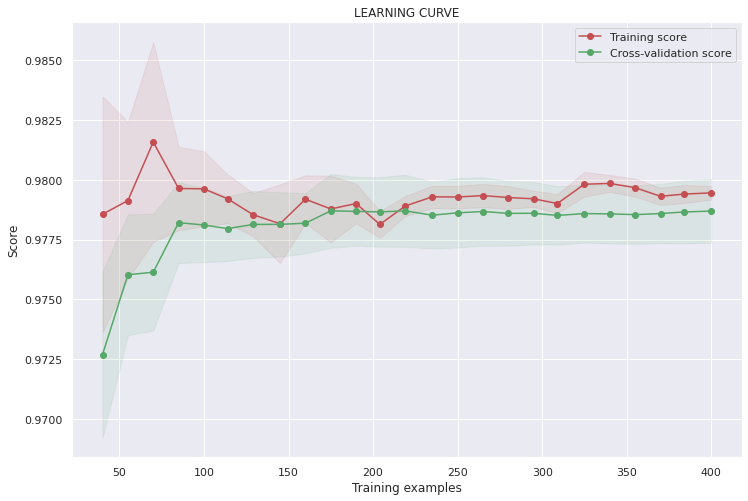

In [65]:
##DATASETS###############################
#Data set (training + test)
n_samples = 500
x, y_samp = makeCosData(n_samples,0)


##GENERACION DE CURVAS DE APRENDIZAJE
cv=5
n_jobs=1
train_sizes= np.linspace(0.1, 1.0, 25)


train_sizes, train_scores, test_scores = learning_curve(
    PolynomialRegression(5), x[:,None], y_samp, cv=cv, n_jobs=n_jobs, 
    train_sizes=train_sizes,scoring='r2')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


## REPRESENTACIÓN GRÁFICA
plt.figure(figsize=(12, 8))
plt.title('LEARNING CURVE')
plt.xlabel("Training examples")
plt.ylabel("Score")
#plt.ylim(-1, 1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

Como puede observarse la curva de aprendizaje nos muestra como se comporta nuestro modelo a medida que lo entrenamos con más datos:

- Cuando las curvas de entrenamiento y validación convergen significa que añadir más datos al modelo no mejorará el score.

- Si están bastante separadas, significa que el modelo está sobre ajustado por lo que añadir más muestras de entrenamiento puede mejorar el score de validacion.

En nuestro caso, la complejidad optima que muestra la curva de validación es un __MODELO POLINOMICO DE GRADO 4 ó 5__ y un numero de muestras mayor de 250 lo ajusta bien.


## 5. Regularizacion

Un mecanismo para aumentar la complejidad del modelo sin sobreajustarlo es añadir mas variables pero limitar los pesos de los coeficientes $\theta_i$ a que seán bajos, de manera que se limita la variación de la curva que se aprende, es suave, pero tiene en cuenta muchas variables.

Este mecanismo se denomina *Regularización* y consiste en incluir en la función de coste las magnitudes de los parámetros. El algoritmo intentará minimizar la función de coste y por lo tanto también las magnitudes de los parámetros, haciendo que la curva se suavice y evitando el sobreajuste.

Existen muchos tipos de regularización y una de las más populares es la conocida como *ridge regression* or *regularizacion* $L_2$ , a veces también llamada *Tikhonov regularization*.

En la regresión con regularización *ridge*, la función de coste que optimizamos se penaliza la suma de los cuadrados de los coeficientes:
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
donde $\alpha$ es un parámetro libre de diseño del algoritmo y controla fuerza de la penalización que ejerce la regularización. 

Otro mecanismo de regularización muy utilizado es la regularización *Lasso*, donde la función de penalización es la suma de los valores absolutos de los parámetros.

Este tipo de modelo de regresión lineal penalizado se construye en Scikit-Learn con toda una familia de estimadores (``Ridge``, ``Lasso``, etc):

<a url="http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression">Ver detalle de la regularizacion *ridge* y otras</a>



Text(0, 0.5, 'y')

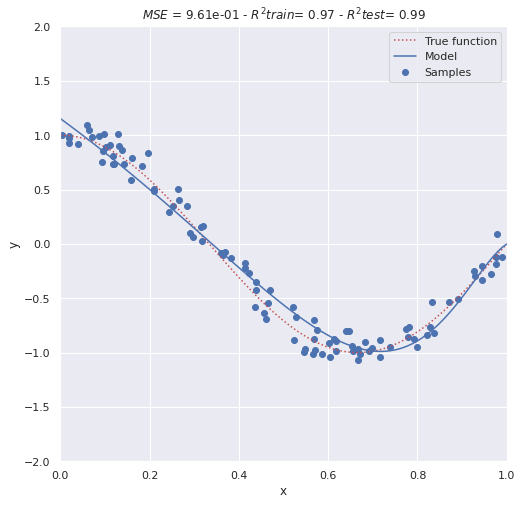

In [66]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

##DATASETS###############################
#training set
n_samples = 100
x, y_samp = makeCosData(n_samples,0)

##THE RIDGE or LASSO REGRESSION MODELs WITH POLYNOMIAL FEATURES##############
reg = linear_model.Ridge(alpha = .1)
#reglasso = linear_model.Lasso(alpha = 0.005) #NOTA si se usa lasso hacer el alpha más pequeño que en el caso ridge (por ejemplo 0,1*alpha en ridge)
model = make_pipeline(PolynomialFeatures(15), reg) #reglasso)
model.fit(x[:, np.newaxis], y_samp) 

#the model predictions
x_fit = np.linspace(0, 1, n_samples)
y_fit = model.predict(x_fit[:, np.newaxis])
y_teor = np.cos(1.5 * np.pi * xfit)

#SCORES######################################
# Measure r2_score
r2_training = r2_score(y_samp,model.predict(x[:, np.newaxis]))
r2_test = r2_score(y_teor, model.predict(x_fit[:, np.newaxis]))

scores = cross_val_score(model,x[:, np.newaxis], y_samp,cv=5)


plt.figure(figsize=(8, 8))
plt.plot(x_fit, y_teor , label="True function", c='r', linestyle=':')
plt.scatter(x, y_samp, c='b', label='Samples')
plt.plot(x_fit, y_fit, label='Model' );
plt.title("$MSE$ = {:.2e} - $R^2 train$= {:.2} - $R^2 test$= {:.2}".format(scores.mean(),r2_training,r2_test))
plt.legend(loc="best")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.xlabel("x")
plt.ylabel("y")

## 4. EJERCICIO

Hacemos una animación de la gráfica anterior para poder modificar interactivamente los valores de los parámetros del modelo *grado de las variables polinomicas* y el parámetro de la regularización $\alpha$.

In [67]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

##DATASETS###############################
#training set
n_samples = 100
x, y_samp = makeCosData(n_samples,0)

def f(alpha,degree, regtitle):
    ##THE RIDGE or LASSO REGRESSION MODELs WITH POLYNOMIAL FEATURES##############
    if regtitle=='RIDGE':
        reg = linear_model.Ridge(alpha)
    if regtitle=='LASSO':
        #we need a smaller alpha for lasso regularization
        #NOTA si se usa lasso hacer el alpha más pequeño que en el caso ridge (por ejemplo 0,1*alpha en ridge)
        reg = linear_model.Lasso(alpha = 0.1*alpha)
    model = make_pipeline(PolynomialFeatures(degree), reg)
    model.fit(x[:, np.newaxis], y_samp) 

    #the modelpredictions
    x_fit = np.linspace(0, 1, n_samples)
    y_fit = model.predict(x_fit[:, np.newaxis])
    y_teor = np.cos(1.5 * np.pi * xfit)

    #SCORES######################################
    # Measure r2_score
    r2_training = r2_score(y_samp,model.predict(x[:, np.newaxis]))
    r2_test = r2_score(y_teor, model.predict(x_fit[:, np.newaxis]))

    scores = cross_val_score(model,x[:, np.newaxis], y_samp,cv=5)

    plt.figure(figsize=(8, 8))
    plt.plot(x_fit, y_teor , label="True function", c='r', linestyle=':')
    plt.scatter(x, y_samp, c='b', label='Samples')
    plt.plot(x_fit, y_fit, label='Model' );
    plt.title(regtitle+" REGRESSION: $MSE$ = {:.2e} - $R^2 train$= {:.2} - $R^2 test$= {:.2}".format(scores.mean(),r2_training,r2_test))
    plt.legend(loc="best")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
var_widget= widgets.RadioButtons(
options=['RIDGE', 'LASSO'],
description='Select regression type:',
disabled=False
)

interactive_plot = interactive(f, alpha=(0.1, 1.0),degree=(2, 15), regtitle=var_widget)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.55, description='alpha', max=1.0, min=0.1), IntSlider(value=8, descr…

## 7. Ejercicio

Carga el set de datos de la diabetes. Ajusta el modelo. Calcula el $R^2$. Predice si alguien tiene diabetes.

<a url="http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset">Ver detalle del dataset</a>



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


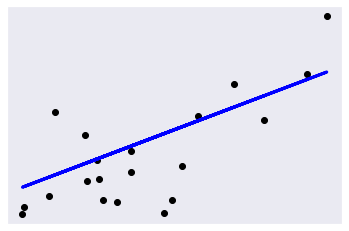

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()